In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import json
import seaborn as sns
import tensorflow as tf

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud

Populating the interactive namespace from numpy and matplotlib


In [2]:
imageDirectory = "train2014/train2014"
question_file_path = 'v2_OpenEnded_mscoco_train2014_questions.json'
annotation_file_path = 'v2_mscoco_train2014_annotations.json'

In [3]:
with open(question_file_path, 'r') as f:
    questions = json.load(f)
    questions = questions["questions"]

with open(annotation_file_path, 'r') as f:
    annotations = json.load(f)
    annotations = annotations["annotations"]

In [4]:
print("Total Number Questions is : ",len(questions))

Total Number Questions is :  443757


In [5]:
questions_df = pd.DataFrame(questions)
questions_df.head(5)

,image_id,question,question_id
0,458752,What is this photo taken looking through?,458752000
1,458752,What position is this man playing?,458752001
2,458752,What color is the players shirt?,458752002
3,458752,Is this man a professional baseball player?,458752003
4,262146,What color is the snow?,262146000


In [6]:
annotations_df = pd.DataFrame(annotations)
annotations_df.head(5)


,question_type,multiple_choice_answer,answers,image_id,answer_type,question_id
0,what is this,net,"[{'answer': 'net', 'answer_confidence': 'maybe...",458752,other,458752000
1,what,pitcher,"[{'answer': 'pitcher', 'answer_confidence': 'y...",458752,other,458752001
2,what color is the,orange,"[{'answer': 'orange', 'answer_confidence': 'ye...",458752,other,458752002
3,is this,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",458752,yes/no,458752003
4,what color is the,white,"[{'answer': 'white', 'answer_confidence': 'yes...",262146,other,262146000


In [7]:
data = pd.merge(questions_df,annotations_df,  how='inner', left_on=['image_id','question_id'], right_on = ['image_id','question_id'])

In [8]:
data.head(5)

,image_id,question,question_id,question_type,multiple_choice_answer,answers,answer_type
0,458752,What is this photo taken looking through?,458752000,what is this,net,"[{'answer': 'net', 'answer_confidence': 'maybe...",other
1,458752,What position is this man playing?,458752001,what,pitcher,"[{'answer': 'pitcher', 'answer_confidence': 'y...",other
2,458752,What color is the players shirt?,458752002,what color is the,orange,"[{'answer': 'orange', 'answer_confidence': 'ye...",other
3,458752,Is this man a professional baseball player?,458752003,is this,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
4,262146,What color is the snow?,262146000,what color is the,white,"[{'answer': 'white', 'answer_confidence': 'yes...",other


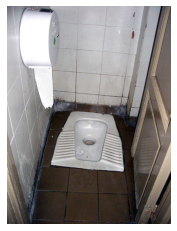

**************************************************
Question :  What room is this?
**************************************************
Answer :  bathroom
(640, 480, 3)


In [11]:
index = np.random.randint(0,len(data))

img_path =  imageDirectory + '/COCO_train2014_' + '%012d.jpg' % (data['image_id'][index])
img=mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()
print("*"*50)
print("Question : " ,data['question'][index])
print("*"*50)
print("Answer : ", data['multiple_choice_answer'][index])

print(img.shape)

Max number of questions on a image 275
Min number of questions on a image 3
Mean of questions on a image 5.3604846405663


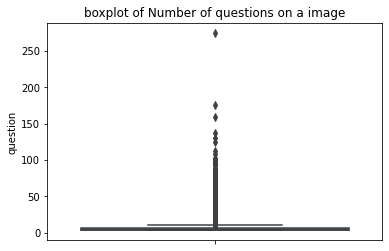

In [9]:
aggregations = {'question': 'count'}
temp = pd.DataFrame(data.groupby(['image_id'],as_index=False).agg(aggregations))
num_of_ques_in_image = temp['question'].values
print("Max number of questions on a image",max(num_of_ques_in_image))
print("Min number of questions on a image",min(num_of_ques_in_image))
print("Mean of questions on a image",np.mean(num_of_ques_in_image))

ax = sns.boxplot(y = 'question', data = temp) 
plt.title("boxplot of Number of questions on a image")
plt.show()

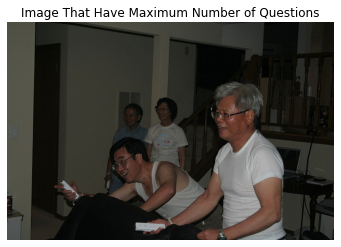

In [10]:
img_path =  imageDirectory + '/COCO_train2014_' + '%012d.jpg' % (temp[temp['question'] == 275]['image_id'].values[0])
img=mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.title("Image That Have Maximum Number of Questions")
plt.show()

                                Duplicate Questions on same Image

In [11]:
aggregations = {'question_id':'count', 'multiple_choice_answer': lambda x: " || ".join(x)}
temp = pd.DataFrame(data.groupby(['image_id','question'],as_index=False).agg(aggregations)).rename(columns={'question_id':'count'})
temp = temp[temp['count']>1]
temp

,image_id,question,count,multiple_choice_answer
161,312,How many baby elephants are there?,2,1 || 1
1801,2614,What does the man in the blue shirt have in hi...,2,frisbee || frisbee
2035,3008,What color is the woman's hair?,2,brown || brown
8122,11065,What color is the horse?,2,brown || brown
12228,16414,What color is the parking meter?,2,black and yellow || black
...,...,...,...,...
416873,547471,What color is the man's suit?,2,black || black
422225,554455,What color is the clock?,2,gold || gold
426189,559619,What does the red sign say?,2,stop || stop
429722,564264,What is the dog carrying?,2,toy || toy


In [12]:
print("Number of unique Question type in dataset : ",len(data.question_type.unique()))
print(" ")
data.question_type.unique()

Number of unique Question type in dataset :  65
 


array(['what is this', 'what', 'what color is the', 'is this',
       'what is the person', 'what is in the', 'is the', 'is there',
       'what is the', 'is', 'is the man', 'none of the above', 'does the',
       'are the', 'was', 'how many', 'what color is', 'what is the man',
       'what is on the', 'what is', 'how many people are in',
       'is there a', 'is it', 'is the person', 'what does the',
       'is this a', 'how', 'are there', 'has', 'could', 'where is the',
       'are', 'are they', 'are these', 'why is the',
       'how many people are', 'what color are the', 'what type of',
       'where are the', 'what kind of', 'which', 'do', 'what is the name',
       'is this an', 'what is the color of the', 'what color',
       'what sport is', 'what are', 'what brand', 'what time',
       'what are the', 'does this', 'is the woman', 'are there any',
       'is that a', 'what animal is', 'why', 'do you',
       'what is the woman', 'is this person', 'can you', 'is he',
       'wh

In [13]:
def getFrequnctDict(data,column,isJoin=False):
    column_frequency = {}

    for _row in data[column]:
        if isJoin:
            _row = "_".join(_row.split())
        if(column_frequency.get(_row,-1) > 0):
            column_frequency[_row] += 1
        else:
            column_frequency[_row] = 1

    return column_frequency


In [14]:
def lineChart(data,column,top=20,isJoin=False):
    column_frequncy = getFrequnctDict(data,column,isJoin)
    sort_column_frequncy = sorted(list(column_frequncy.items()),key = lambda x: x[1],reverse=True)
    total_samples =  len(data)

    plt.plot([x[1]for x in sort_column_frequncy[:top]])
    i=np.arange(top)
    plt.title("Frequency of top " + str(top) + " " + column )
    plt.xlabel("Tags")
    plt.ylabel("Counts")
    plt.xticks(i,[x[0] for x in sort_column_frequncy[:top]])
    plt.xticks(rotation=90)
    plt.show()
    return sort_column_frequncy



In [15]:
def plotWordCloud(data,column,isJoin=False):
    column_frequncy = getFrequnctDict(data,column,isJoin)
    #https://www.geeksforgeeks.org/generating-word-cloud-python/
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = None, 
                    min_font_size = 10).generate_from_frequencies(column_frequncy)
    # plot the WordCloud image     
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title("WordCloud on "+ column)  
    plt.show()

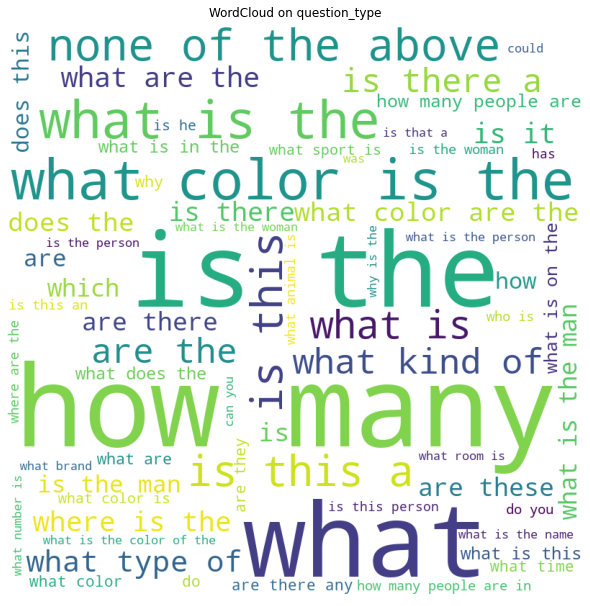

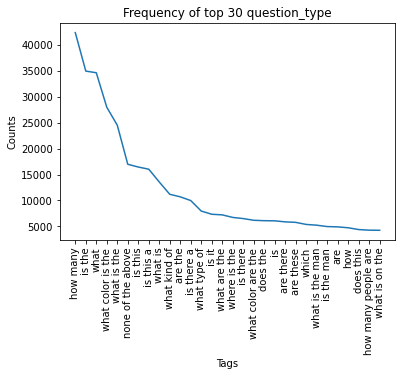

In [16]:
plotWordCloud(data, 'question_type')
question_type_frequncy = lineChart(data, 'question_type', top = 30)

In [17]:
for _type,_count in question_type_frequncy[:10]:
    print("Percentage of '" + _type + "' Type of Questions in Dataset is ", str(100*_count/len(data)) )

Percentage of 'how many' Type of Questions in Dataset is  9.541032592161926
Percentage of 'is the' Type of Questions in Dataset is  7.8707490811412555
Percentage of 'what' Type of Questions in Dataset is  7.7988628911769275
Percentage of 'what color is the' Type of Questions in Dataset is  6.301196375493795
Percentage of 'what is the' Type of Questions in Dataset is  5.521490365222408
Percentage of 'none of the above' Type of Questions in Dataset is  3.8248410729295537
Percentage of 'is this' Type of Questions in Dataset is  3.7056316858100264
Percentage of 'is this a' Type of Questions in Dataset is  3.610985291499627
Percentage of 'what is' Type of Questions in Dataset is  3.0559517934364977
Percentage of 'what kind of' Type of Questions in Dataset is  2.522101059814268


In [18]:
data['answer_type'].unique()

array(['other', 'yes/no', 'number'], dtype=object)

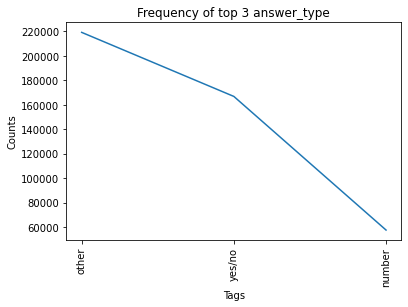

In [19]:
answer_type_frequency = lineChart(data, 'answer_type', top = 3)

In [21]:
for _type,_count in answer_type_frequency:
    print("Percentage of '" + _type + "' Type of Answers in Dataset is ", str(100*_count/len(data)) )

Percentage of 'other' Type of Answers in Dataset is  49.41195293820717
Percentage of 'yes/no' Type of Answers in Dataset is  37.60661803644788
Percentage of 'number' Type of Answers in Dataset is  12.981429025344953


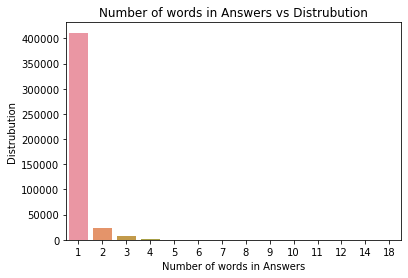

In [22]:
sns.countplot(data["multiple_choice_answer"].apply(lambda x: len(x.split())).values)
plt.title("Number of words in Answers vs Distrubution")
plt.xlabel("Number of words in Answers")
plt.ylabel("Distrubution")
plt.show()

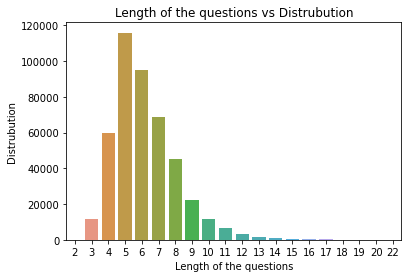

In [31]:
sns.countplot(data["question"].apply(lambda x: len(x.split())).values)
plt.title("Length of the questions vs Distrubution")
plt.xlabel("Length of the questions")
plt.ylabel("Distrubution")
plt.show()

In [26]:
temp = data
top_question = [x[0] for x in question_type_frequncy[:50]]
top_aswers = [x[0] for x in answer_type_frequency[:50]]


aggregations = {'question': 'count'}
temp = pd.DataFrame(temp.groupby(['question_type','multiple_choice_answer'],as_index=False).agg(aggregations))
temp = temp[temp['question']>=10]
temp = temp.pivot(index='question_type', columns='multiple_choice_answer', values='question')

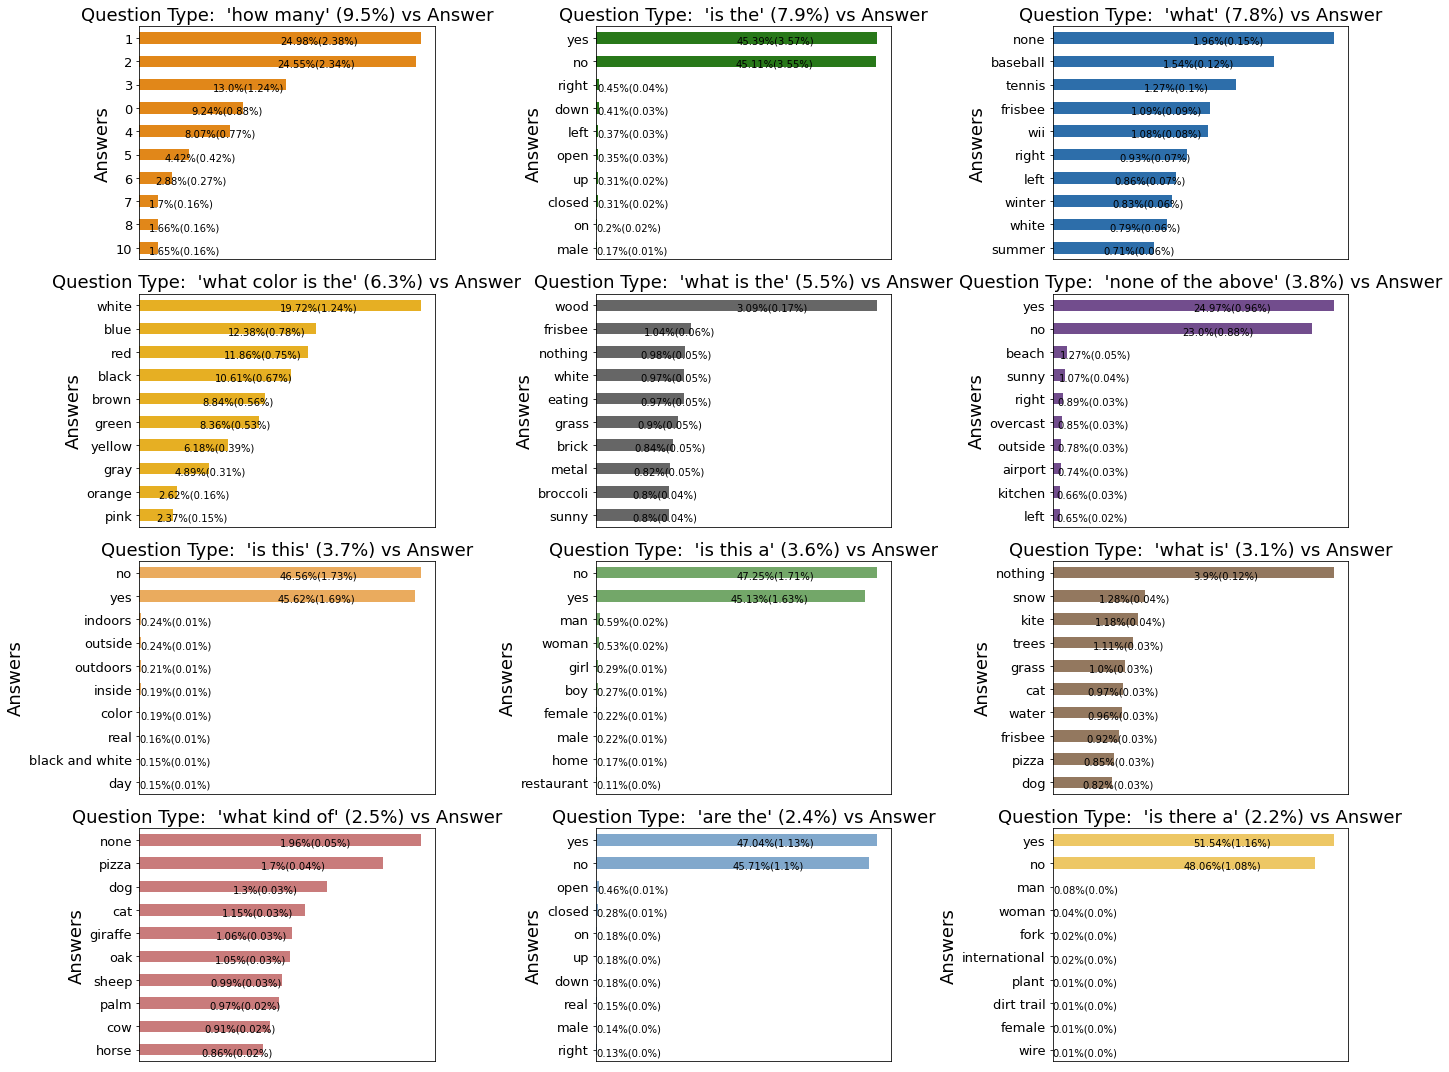

In [28]:
fig = plt.figure(figsize=(80,30))
fig.tight_layout() 
count = 1
colorCodes = [ "#E18719", "#287819", "#2D6EAA", "#E6AF23", "#666666","#724D8D", "#EAAB5E", "#73A769","#93785F",
              "#C97B7B", "#81A8CC", "#EDC765", "#858585","#957AA9", "#F3CFA3","#B4D0AF", "#BEADA0", "#E4BDBD", 
              "#ABC5DD", "#F4DB9C", "#A3A3A3"]

for _type,_ in question_type_frequncy[:12]:

    percentage = str(round((len(data[data['question_type']==_type])/len(data))*100,1))+'%'

    plt.subplot(4, 3, count)
    temp = data[data['question_type']==_type]
    ax = temp['multiple_choice_answer'].value_counts()[:10][::-1].plot(kind='barh', figsize=(20,15),color=colorCodes[count-1], fontsize=13)
    ax.set_alpha(0.8)   
    ax.set_title("Question Type:  '" + _type + "' (" + percentage + ") vs Answer" , fontsize=18)
    ax.set_ylabel("Answers", fontsize=18)
    ax.get_xaxis().set_visible(False)


    for i in ax.patches:
        ax.text(i.get_width()/2, i.get_y(), str(round((i.get_width()/len(temp))*100, 2))+'%' + "(" +
                str(round((i.get_width()/len(data))*100, 2))+'%' +")", fontsize=10,color='black')
        
    count += 1

fig.tight_layout()
plt.show()

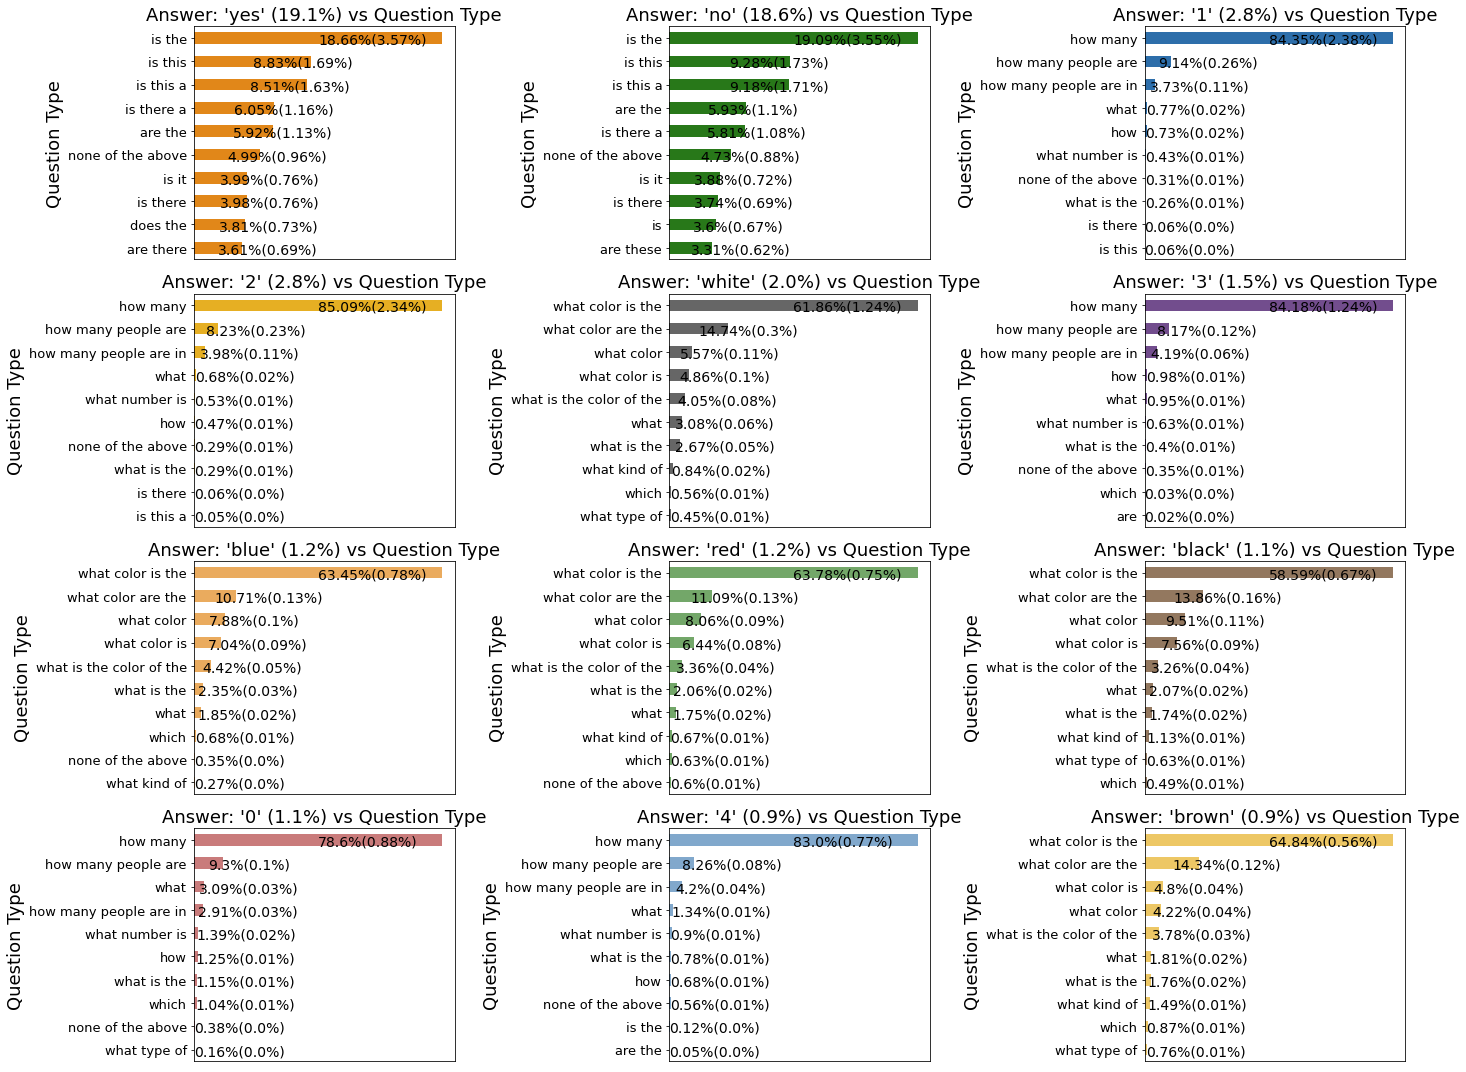

In [29]:
fig = plt.figure()
fig.tight_layout() 
count = 1

colorCodes = [ "#E18719", "#287819", "#2D6EAA", "#E6AF23", "#666666","#724D8D", "#EAAB5E", "#73A769","#93785F",
              "#C97B7B", "#81A8CC", "#EDC765", "#858585","#957AA9", "#F3CFA3","#B4D0AF", "#BEADA0", "#E4BDBD", 
              "#ABC5DD", "#F4DB9C", "#A3A3A3"]

answer_frequncy = sorted(list(getFrequnctDict(data,'multiple_choice_answer').items()),key = lambda x: x[1],reverse=True)

for _type,_ in answer_frequncy[:12]:

    percentage = str(round((len(data[data['multiple_choice_answer']==_type])/len(data))*100,1))+'%'

    plt.subplot(4, 3, count)
    temp = data[data['multiple_choice_answer']==_type]
    ax = temp['question_type'].value_counts()[:10][::-1].plot(kind='barh', figsize=(20,15),color=colorCodes[count-1], fontsize=13)
    ax.set_alpha(0.8)   
    ax.set_title("Answer: '" + _type + "' (" + percentage + ") vs Question Type" , fontsize=18)
    ax.set_ylabel("Question Type", fontsize=18)
    ax.get_xaxis().set_visible(False)

    for i in ax.patches:
        ax.text(i.get_width()/2, i.get_y(), str(round((i.get_width()/len(temp))*100, 2))+'%' + "(" +
                str(round((i.get_width()/len(data))*100, 2))+'%' +")", fontsize=14,color='black')
        
    count += 1

fig.tight_layout()
plt.show()